In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op

In [87]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot or uproo4
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions.ipynb
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to functions for taking discrete derivatives of lists of data
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Derivatives.ipynb

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

In [22]:
dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/06-23-2023/cc"
root_file=dir+"/exp_e16_clas6_cc_06-23-2023.root"
file=uproot3.open(root_file)

#0-> pid | 1->event selection all 
which=0
sides=["left","coinc","right"]

In [23]:
layer1="CC"
if which==0:
    layer2="min_cc_pid"
    layer3=layer2+"_cut"
    layer4=layer3+"_mnone"
    layer5=[layer3+"_mnone_sec"+str(sec+1) for sec in range(6)]
    layer6=[[layer5[sec]+"_"+sides[side] for side in range(3)] for sec in range(6)]
    layer7=[[["cc_pid_cut_mnone_sec"+str(sec+1)+"_"+sides[side]+"_seg"+str(seg+1) for seg in range(18)] for side in range(3)] for sec in range(6)]
elif which==1:
    layer2="min_cc_event"
    layer3=layer2+"_cut"
    layer4=layer3+"_mall"
    layer5=[layer3+"_mall_sec"+str(sec+1) for sec in range(6)]
    layer6=[[layer5[sec]+"_"+sides[side] for side in range(3)] for sec in range(6)]
    layer7=[[["cc_event_cut_mall_sec"+str(sec+1)+"_"+sides[side]+"_seg"+str(seg+1) for seg in range(18)] for side in range(3)] for sec in range(6)]
else:
    print("You need to specify pid or event selection")
hist_names = [[[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5[sec]+"/"+layer6[sec][side]+"/"+layer7[sec][side][seg] for seg in range(18)] for side in range(3)] for sec in range(6)]




In [24]:
cc_hist=[[[file[hist_names[sec][side][seg]] for seg in range(18)] for side in range(3)] for sec in range(6)]

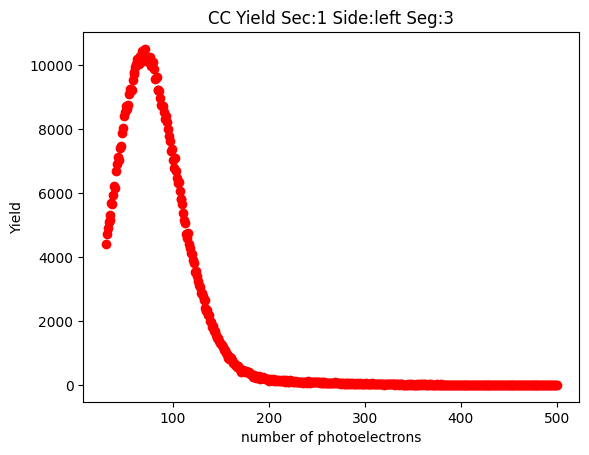

In [65]:
sec=0
side=0
seg=2
cont_x = [Center_Xbins(cc_hist[sec][side][seg])[i+30] for i in range(Num_Xbins(cc_hist[0][0][0])-30)]
val_y = [Values_1d(cc_hist[sec][side][seg])[i+30] for i in range(Num_Xbins(cc_hist[0][0][0])-30)]


plt.scatter(cont_x,val_y,color='r',label="data")
plt.title("CC Yield Sec:{} Side:{} Seg:{}".format(sec+1,sides[side],seg+1))
plt.xlabel("number of photoelectrons")
plt.ylabel("Yield")
plt.show()
            
            
            

Runtime Error
	Just skip it for now


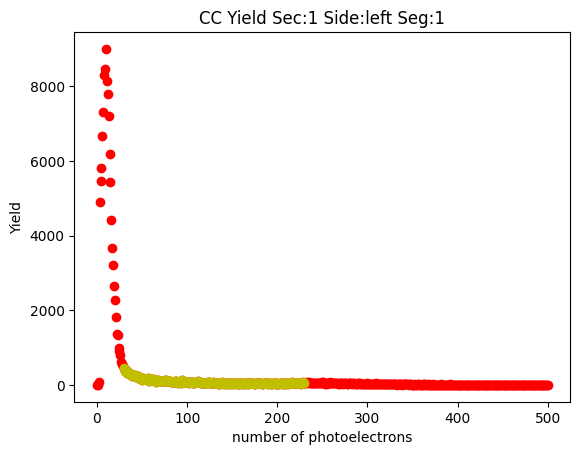

Runtime Error
	Just skip it for now


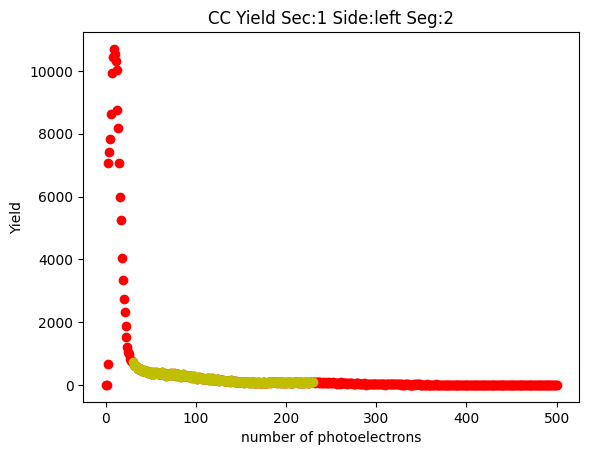

[10042.60236505    72.28846828    35.62772769]
[5.60372134e+03 8.20622948e+01 2.10377447e+01 7.63004210e+03
 2.82232695e-29 7.88429238e+01]


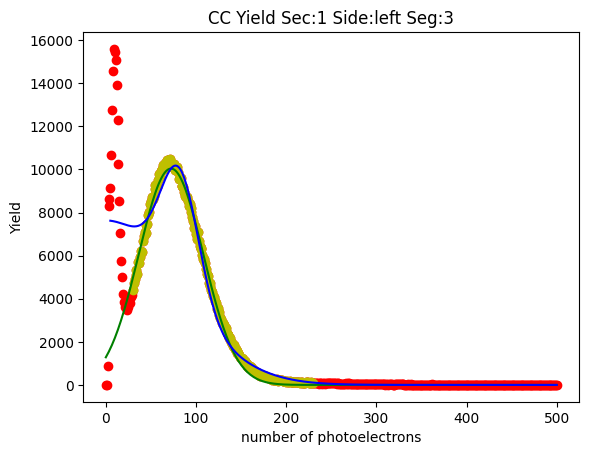

[16624.61840926    69.90526885    45.24136007]
[1.66459852e+04 7.07638200e+01 4.44127840e+01 7.83004761e+03
 9.55746966e+00 4.51108843e+00]


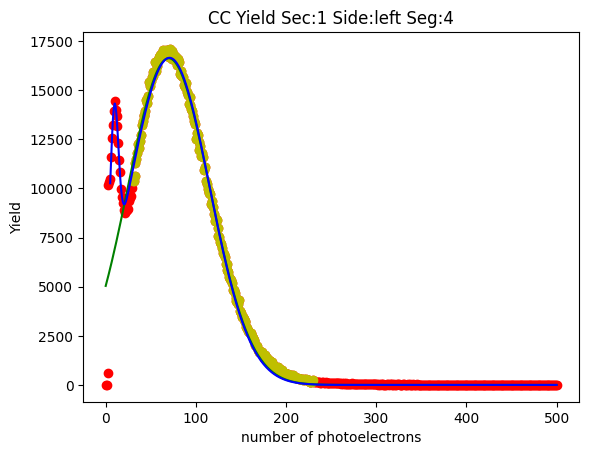

[20207.66502344    90.38076982    43.03268748]
[2.02333270e+04 9.05438219e+01 4.28132290e+01 1.53038272e+04
 9.63190652e+00 5.53024869e+00]


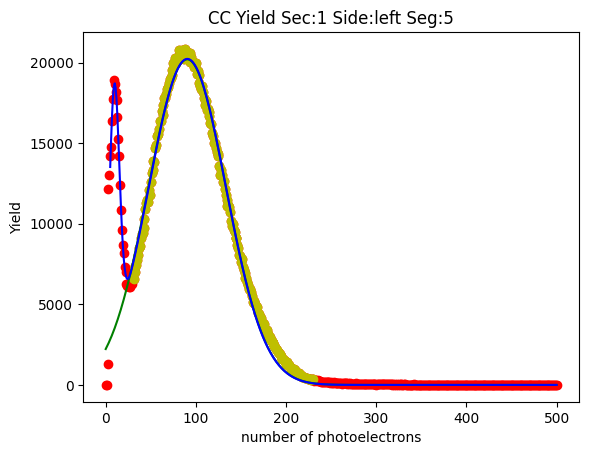

[19811.60974294    98.63120376    42.98756797]
[1.98315898e+04 9.87386978e+01 4.28367514e+01 1.97159669e+04
 9.48345380e+00 4.82258147e+00]


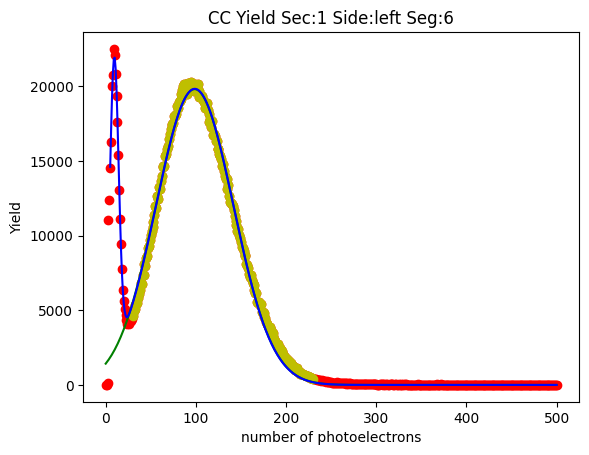

[16514.29225611   115.97338779    46.26548501]
[1.64788965e+04 1.15866183e+02 4.65367030e+01 2.35154812e+04
 9.65799929e+00 5.70251209e+00]


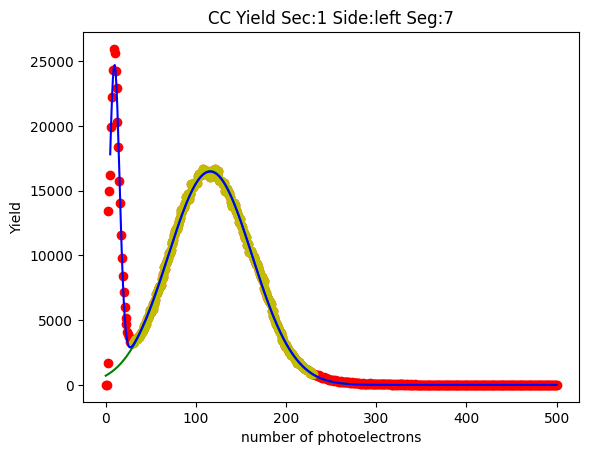

[12183.7767814    113.74517012    45.49373677]
[1.21624891e+04 1.13760713e+02 4.56867740e+01 2.02384176e+04
 9.75768602e+00 5.21696670e+00]


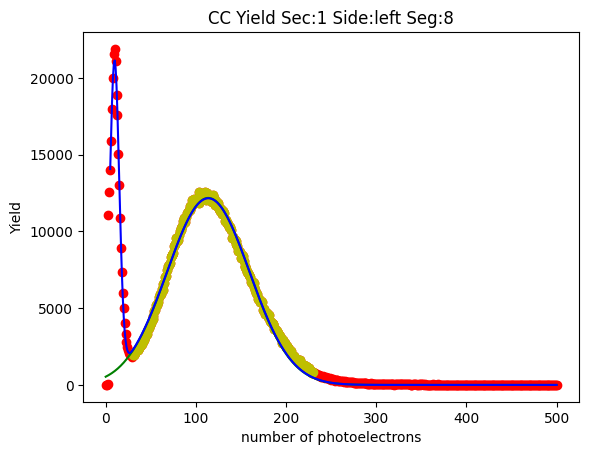

[8110.12228908  127.42333016   56.34981663]
[8.04486472e+03 1.27822275e+02 5.75642259e+01 2.28292178e+04
 1.02602487e+01 4.55932410e+00]


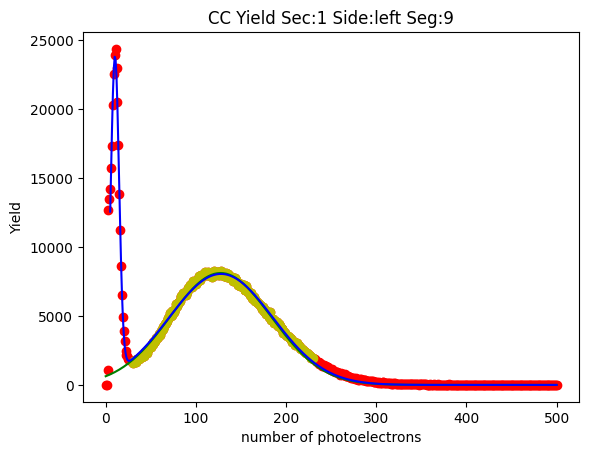

[7689.47915274  136.85987754   59.47880648]
[7.70227306e+03 1.37005663e+02 5.91492633e+01 1.39056394e+04
 1.32690289e+01 7.20201026e+00]


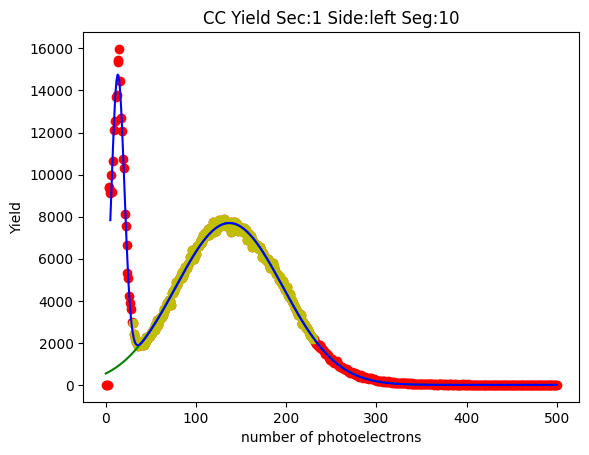

[9255.20907132  118.14195582   55.79763297]
[9.23495195e+03 1.18091989e+02 5.61431440e+01 2.55932598e+04
 9.65440597e+00 4.84938307e+00]


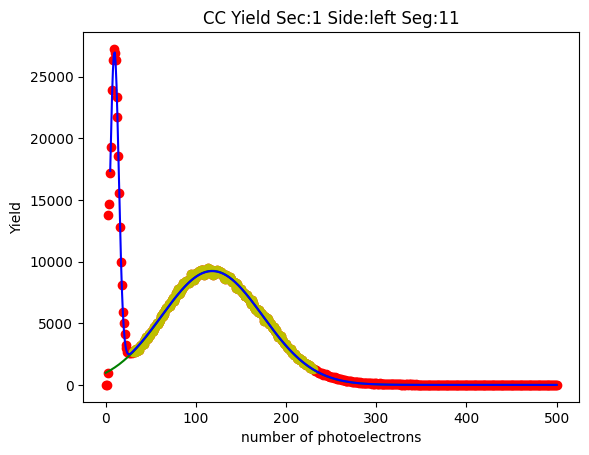

[5491.33746387  129.81269063   60.96024631]
[5.46234996e+03 1.29310834e+02 6.19881083e+01 2.15690276e+04
 9.73108766e+00 6.00041756e+00]


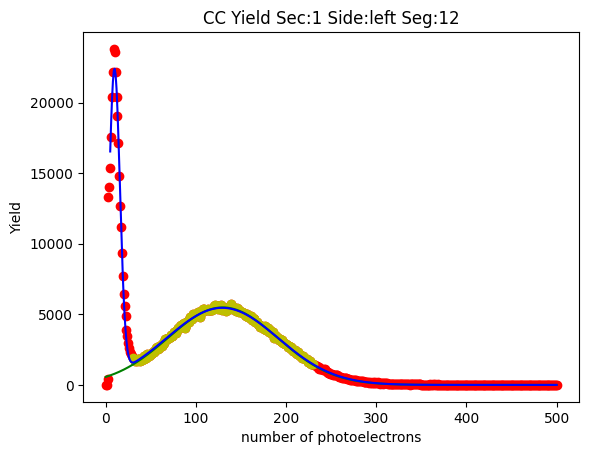

[7099.05062585  128.34292701   55.62672824]
[7.09247054e+03 1.27901069e+02 5.58123857e+01 3.08735452e+04
 9.41893483e+00 4.96436780e+00]


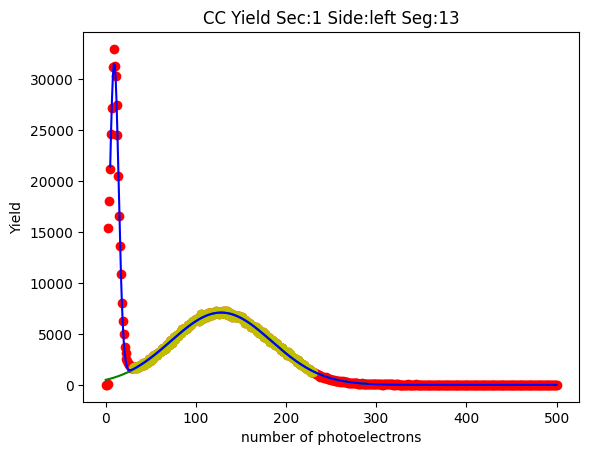

[4841.41974526  128.27418105   57.87256568]
[4.79179105e+03 1.28186758e+02 5.95860310e+01 2.22894537e+04
 9.48655897e+00 4.39948605e+00]


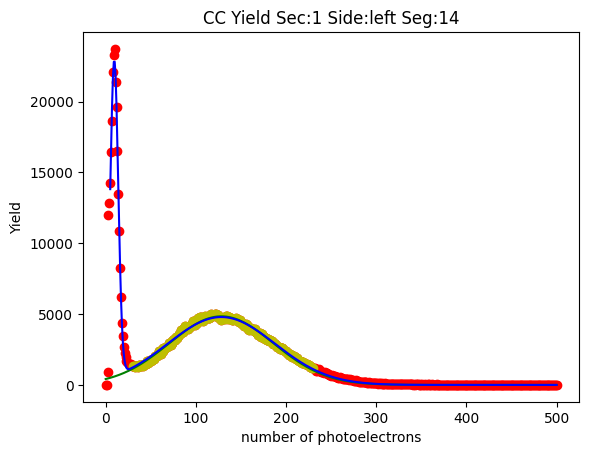

[3631.73947488  109.81074072   58.57313807]
[3.62443560e+03 1.10078032e+02 5.87680360e+01 1.64484814e+04
 1.01012938e+01 7.76964453e+00]


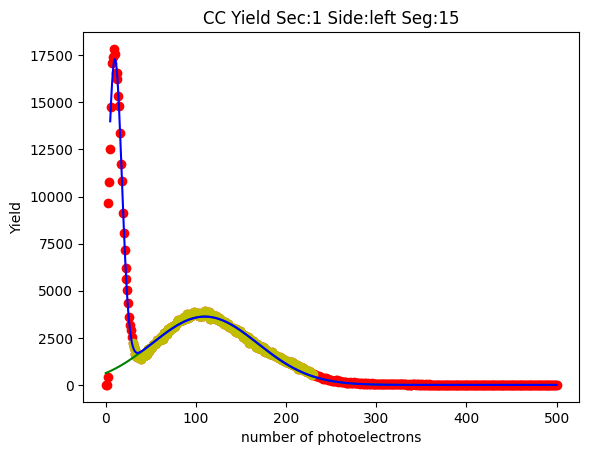

[3512.34140533   83.16319128   45.60717033]
[3.50870159e+03 8.30302285e+01 4.57982569e+01 1.87866779e+04
 8.22639783e+00 4.72780653e+00]


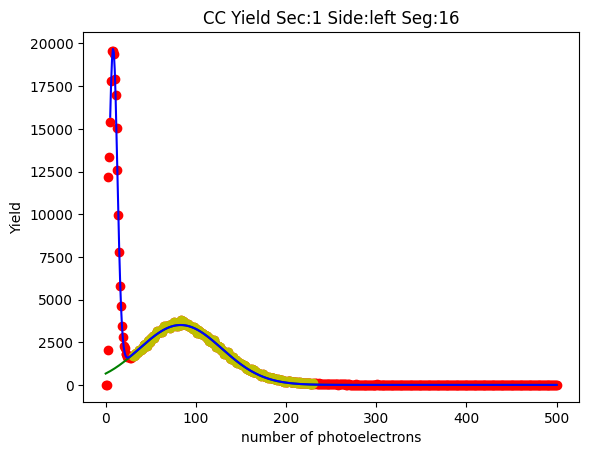

[1321.72463285   72.78252323   65.92526053]
[1.33330515e+03 6.47539684e+01 7.23463667e+01 1.40386521e+04
 9.86377105e+00 4.05753233e+00]


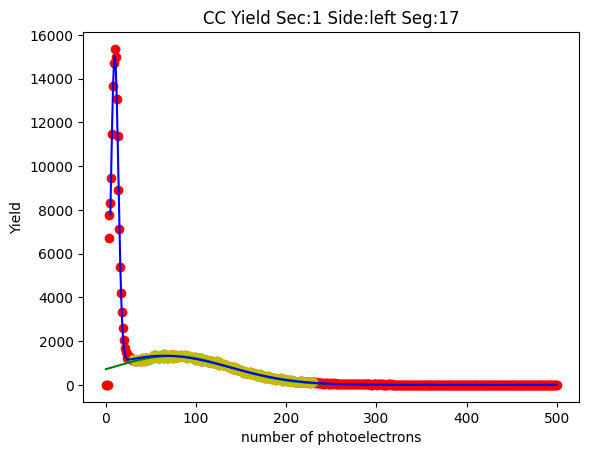

Runtime Error
	Just skip it for now


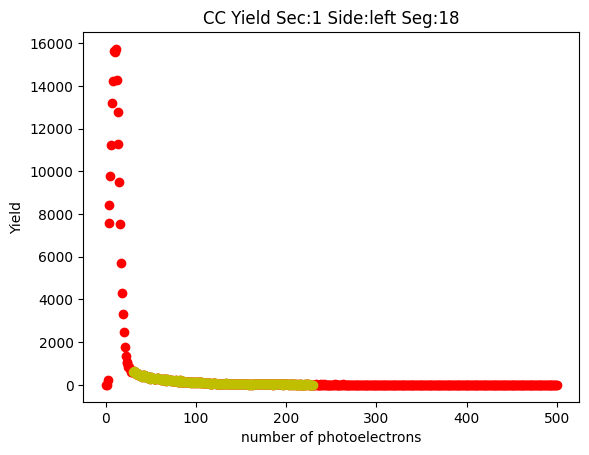

Runtime Error
	Just skip it for now


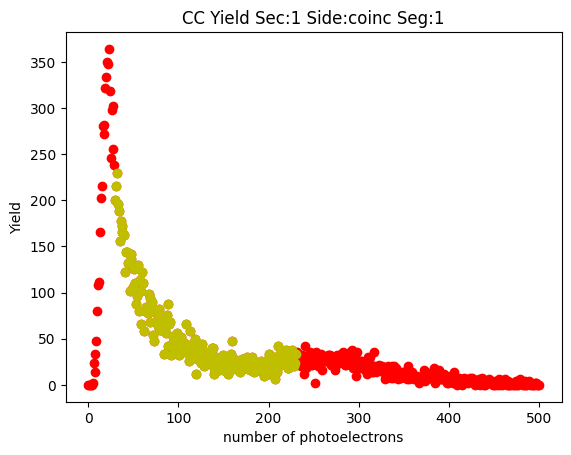

[574.16640055  73.14682315  48.58956752]
[5.78767529e+02 6.99603966e+01 5.09086532e+01 3.09296395e+01
 2.39519783e+02 5.43473570e-03]


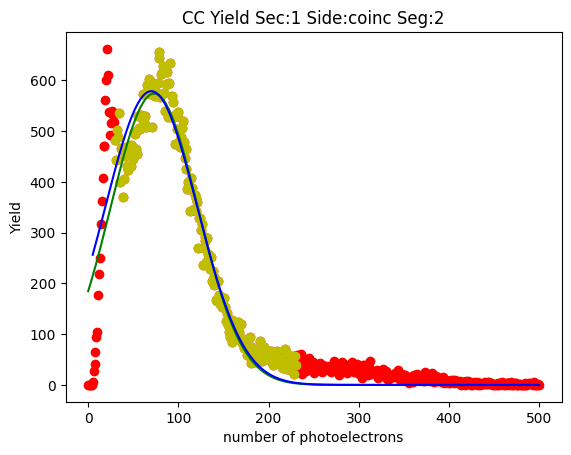

[6519.99461068   76.3663767    34.45395619]
[4728.62141682   66.14386919   25.41116329 2895.04628245   98.77242315
   34.3472138 ]


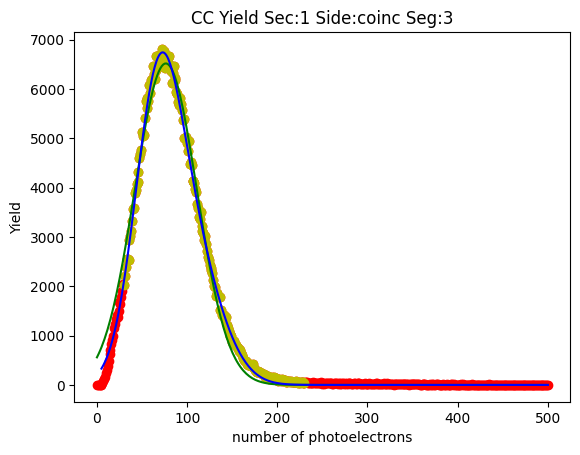

[5984.65604667   79.09746119   39.01906621]
[6.09032039e+03 8.04589274e+01 3.67595721e+01 3.32581101e+01
 8.35111862e+01 6.56024574e-02]


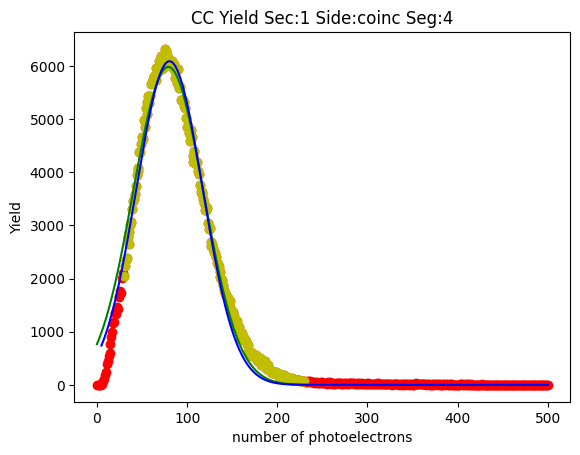

[4885.35030633   88.52233213   38.62403653]
[1581.72208882  114.7918447    43.58430385 3793.9043046    80.33645968
   31.70825493]


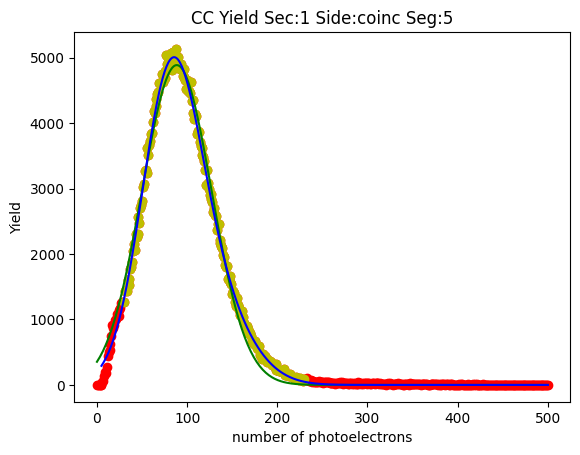

[3166.87381308   67.76174358   42.44537329]
[3.24347546e+03 7.10659806e+01 3.79879534e+01 2.29710707e+01
 7.67129479e+01 3.86306178e-02]


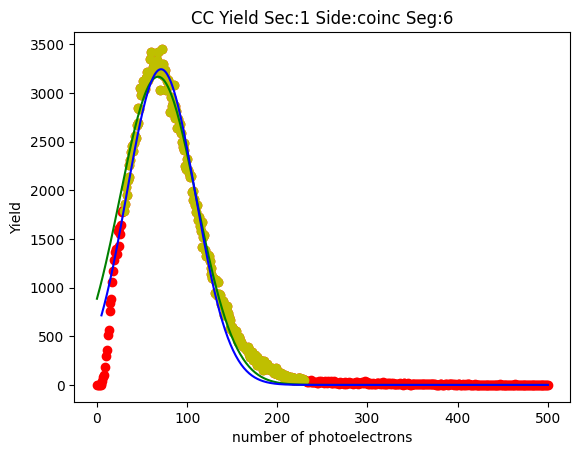

[1541.77769695   73.17172166   61.57328284]
[1.56137344e+03 7.74815956e+01 5.69555603e+01 1.06083980e-01
 3.25301302e+01 7.08497793e-04]


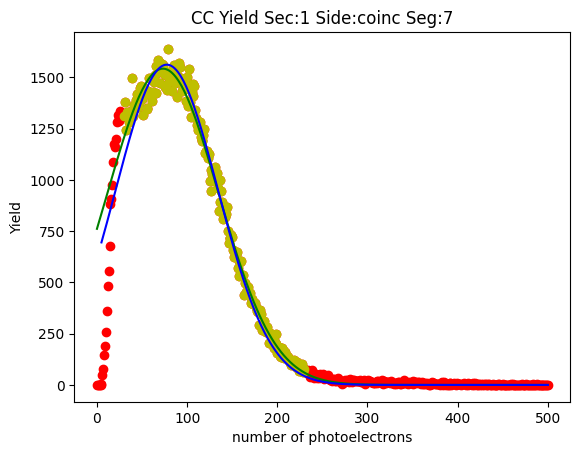

[1571.13970833   98.235636     44.49668405]
[ 497.64787528   94.42538704   24.62712799 1138.16646687   98.61199978
   53.90736487]


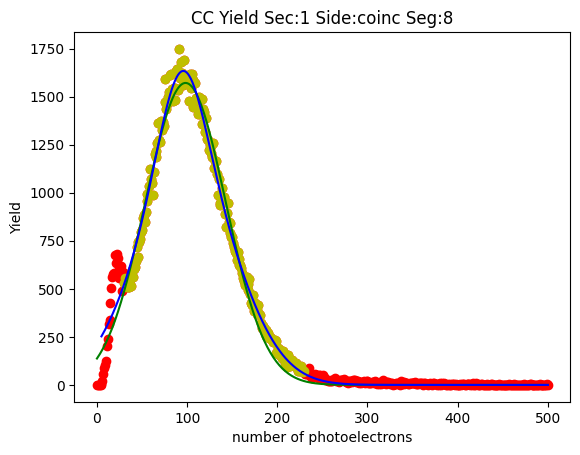

[1074.00798442   97.35039827   50.82180083]
[709.91826939  99.91628004  63.24665056 412.06162509  91.65439119
  30.52433578]


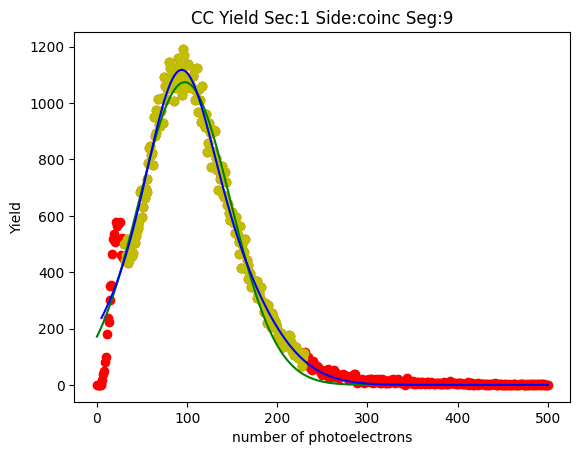

[743.27526457  80.12095123  59.80015274]
[235.56574685 137.66719727  63.55138579 650.10786302  70.65779218
  42.3539116 ]


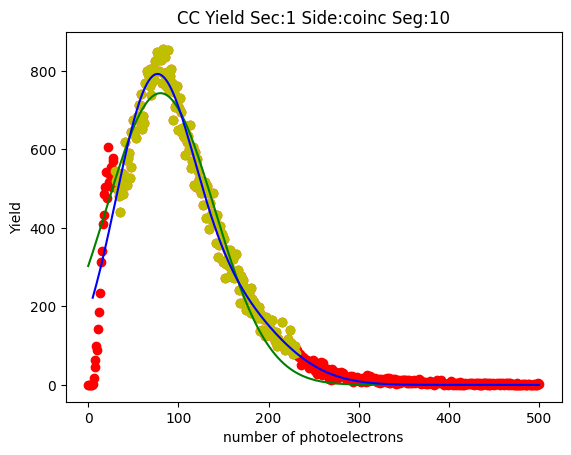

[1019.67642001   74.32397876   51.31170142]
[244.54641411 132.03314713  58.37434398 940.28318201  68.04998109
  38.9568389 ]


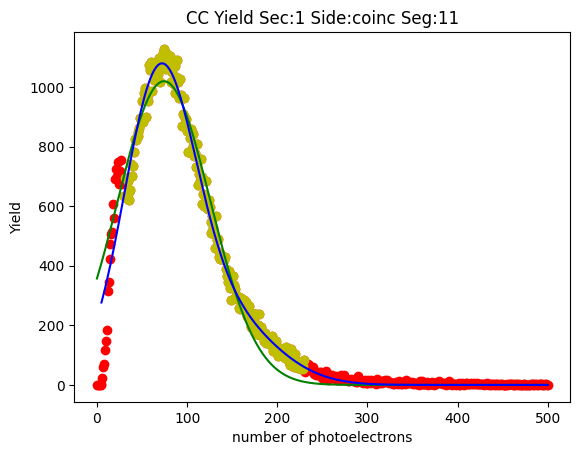

[677.88987827  82.43283476  51.36019316]
[577.00386139  77.33668855  62.01453128 159.20402733  82.94535021
  16.77637874]


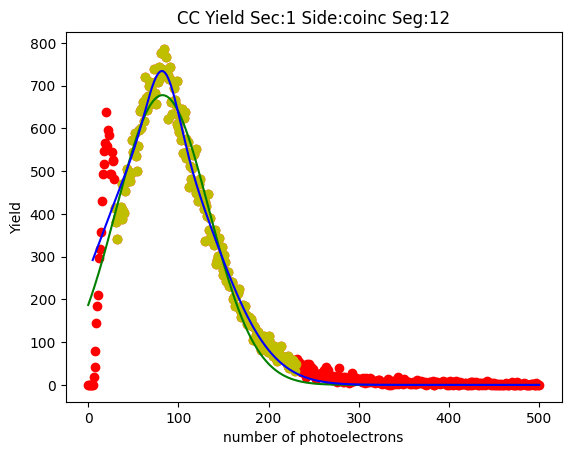

[754.68933668  79.51897772  48.41473151]
[318.33344254  80.31721008  74.85172827 468.00295262  76.3422427
  35.11718042]


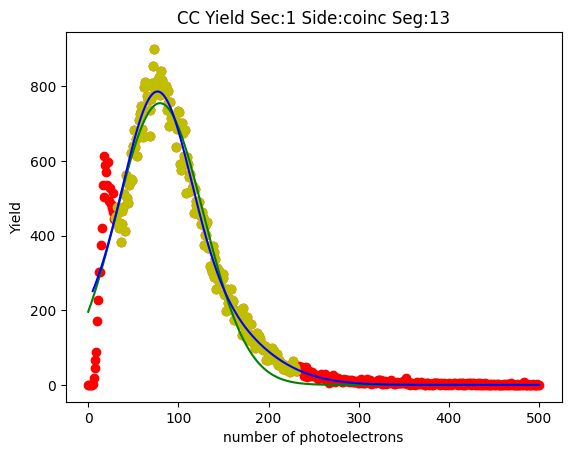

[357.68744088  65.06746771  66.29541331]
[348.84844025  60.42414524  70.83739439  44.92670073  77.07072489
  11.15339226]


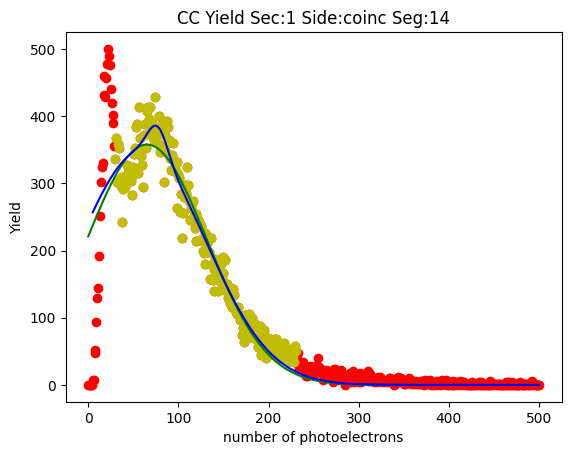

[242.05017497  67.28192271  62.58587634]
[239.30191386  52.77998026  73.75750748  45.20953875  82.13353853
   9.26621491]


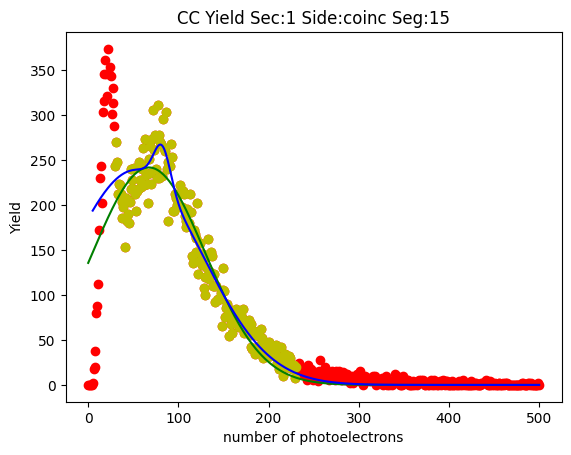

[209.35190856  59.54334545  53.03698908]
[219.07605503  51.46455974  57.11990126  12.2925696   81.1652566
   2.30450602]


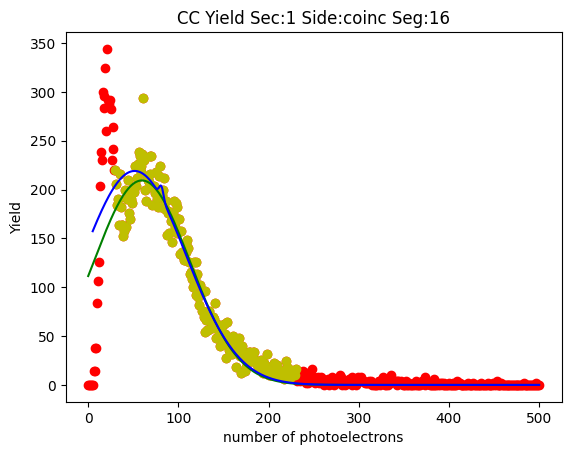

[70.88462745 13.85185137 85.41747011]
[9.55508804e+01 1.83003147e-10 7.94968809e+01 3.51445745e-13
 3.56097827e+01 7.85688225e-01]


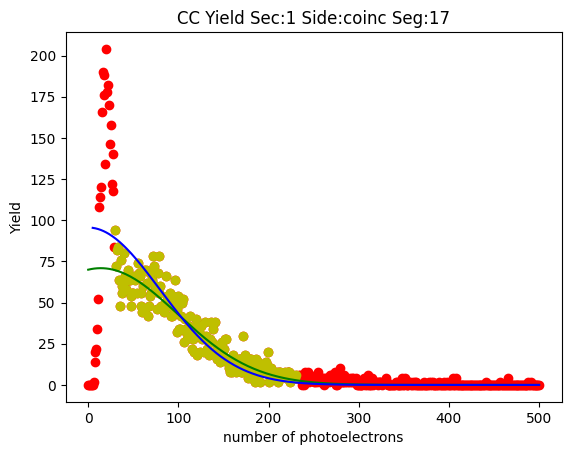

Runtime Error
	Just skip it for now


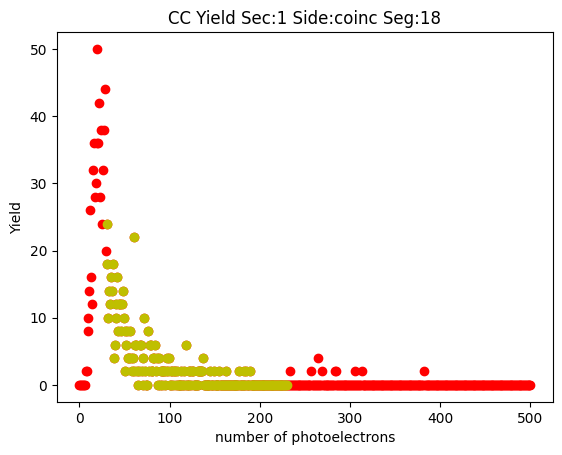

Runtime Error
	Just skip it for now


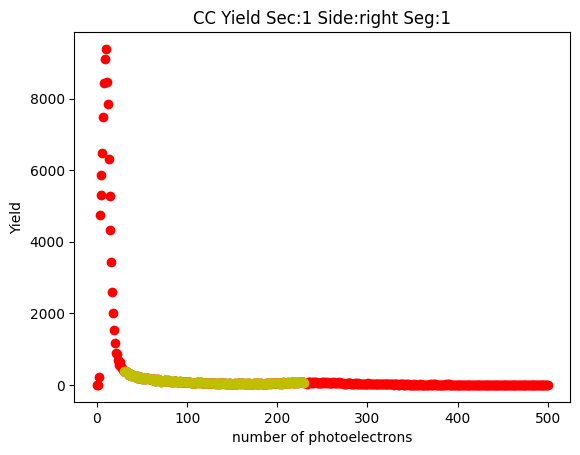

Runtime Error
	Just skip it for now


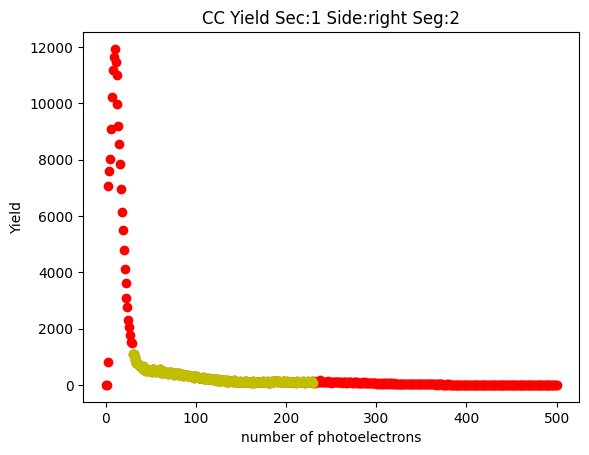

[9390.86330701   77.09175249   38.25413241]
[8.87592494e+03 3.46424581e+01 7.48591999e+01 1.09104312e-13
 3.56097827e+01 5.00000000e+00]


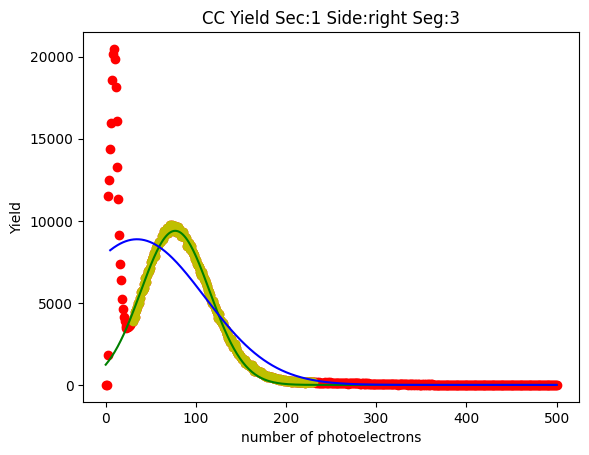

[20782.5423453     77.44961288    38.77558684]
[1.96154923e+04 7.14801384e+01 4.71295937e+01 8.11907011e-11
 3.56097827e+01 5.00000000e+00]


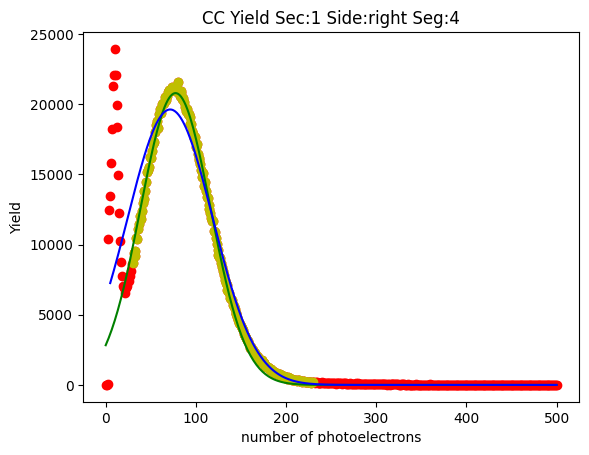

[20397.76666442    84.16060358    39.92989926]
[1.90265996e+04 7.75741411e+01 4.97029540e+01 7.34105854e-11
 3.56097827e+01 5.00000000e+00]


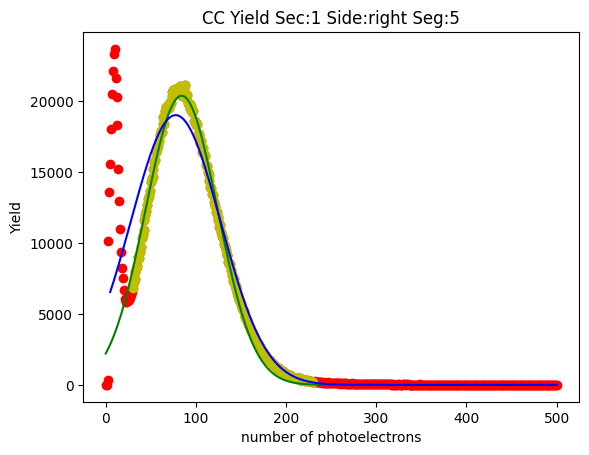

[21984.75421617    72.80939179    36.49784948]
[2.07051888e+04 6.64911614e+01 4.50451706e+01 8.35690478e-11
 3.56097827e+01 5.00000000e+00]


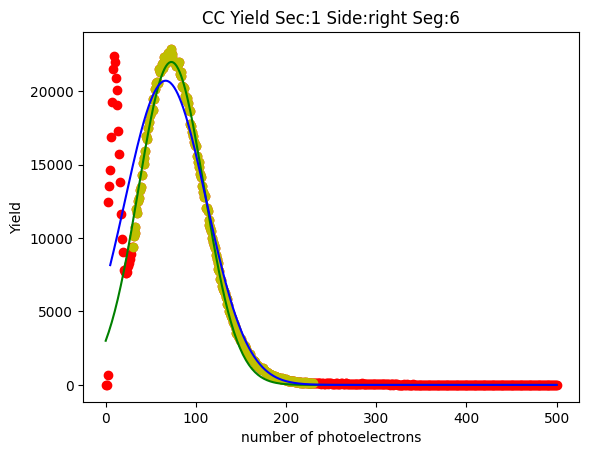

[16357.45353416    90.31139844    47.49632139]
[1.51702532e+04 7.42230898e+01 6.60168777e+01 6.80126032e-11
 3.56097827e+01 5.00000000e+00]


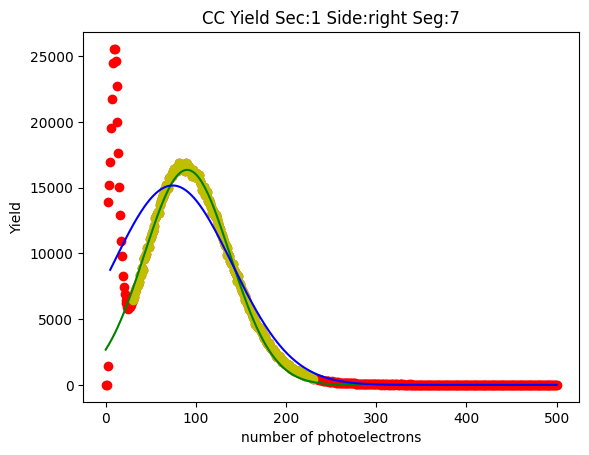

[13211.83987496   104.50463378    44.41205924]
[1.14777675e+04 8.72548713e+01 6.83165900e+01 3.01278119e-16
 3.56097827e+01 5.00000000e+00]


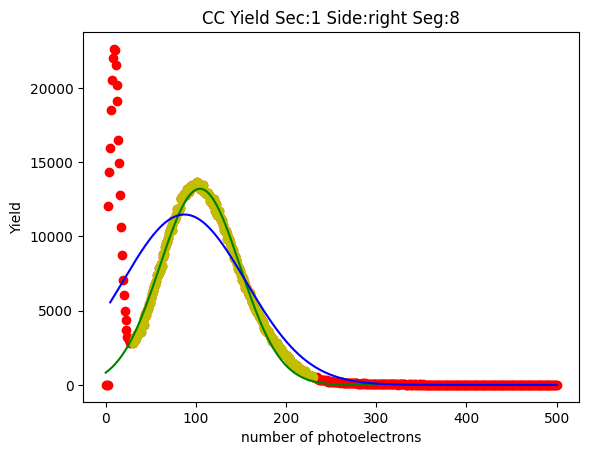

[10273.5432371    108.77164316    49.09025314]
Runtime Error
	Just skip it for now


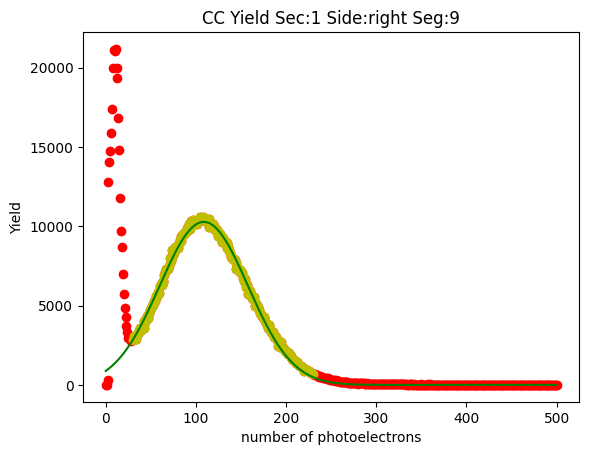

[7440.95500126  110.41006131   59.04940348]
[8.26539748e+03 3.75810405e-07 1.34579061e+02 1.76725283e-23
 3.56097827e+01 5.00000000e+00]


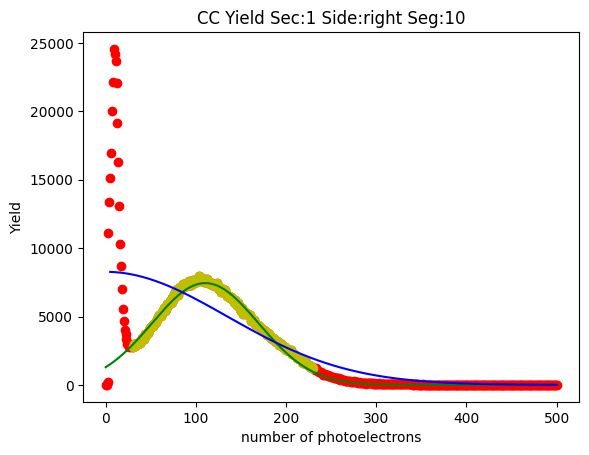

[8390.733196    111.15049253   62.55941534]
[9.74679076e+03 1.09470417e-04 1.33378213e+02 1.68644577e-03
 2.03562721e-01 6.22090016e-04]


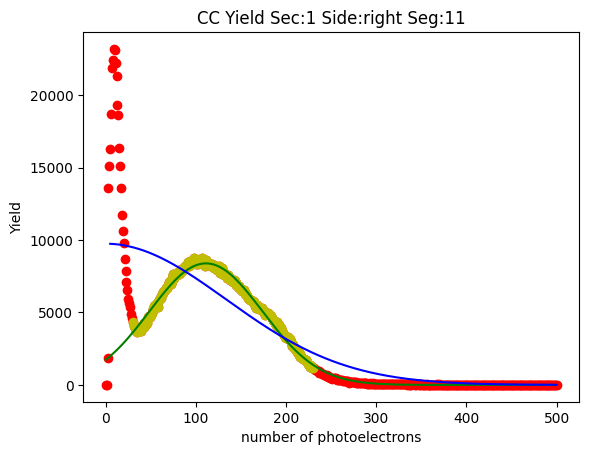

[7567.86992642   97.04776729   48.15797925]
Runtime Error
	Just skip it for now


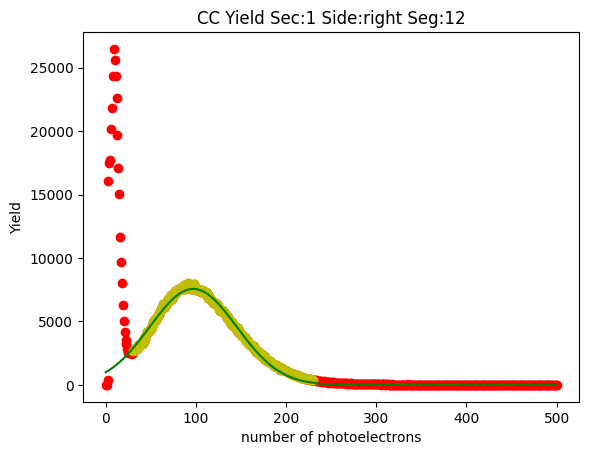

[8992.21460055  104.89556779   48.57648778]
[8.97868579e+03 1.04809380e+02 4.87918109e+01 2.73641840e+04
 9.54717864e+00 4.56609422e+00]


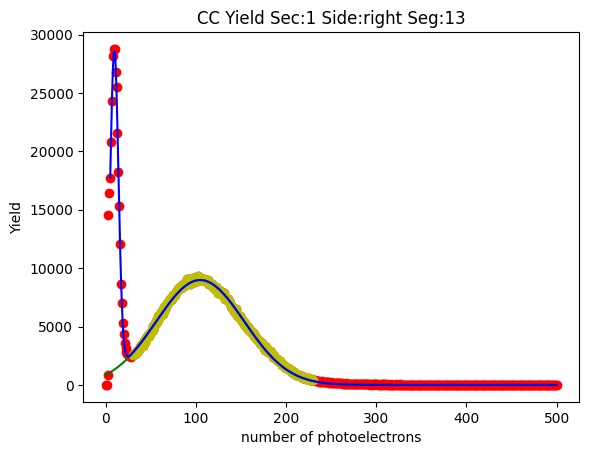

[5622.71931966  101.30225985   51.74031551]
[5.60779569e+03 1.01135309e+02 5.21800772e+01 1.98822532e+04
 9.51907028e+00 6.11688352e+00]


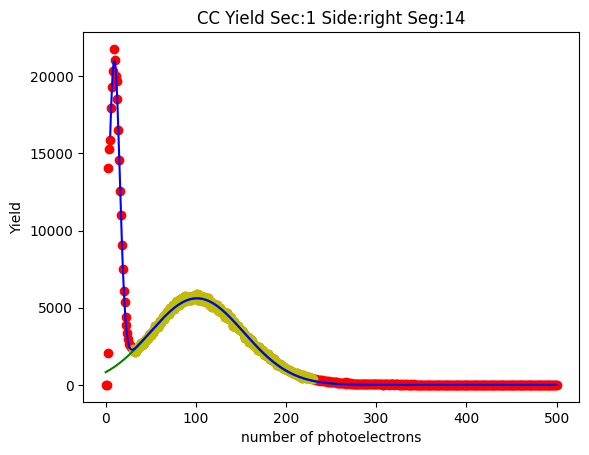

[3268.2606872   109.33263405   55.76581037]
[3.23689210e+03 1.08407788e+02 5.76132618e+01 1.96887697e+04
 9.97433971e+00 4.87527142e+00]


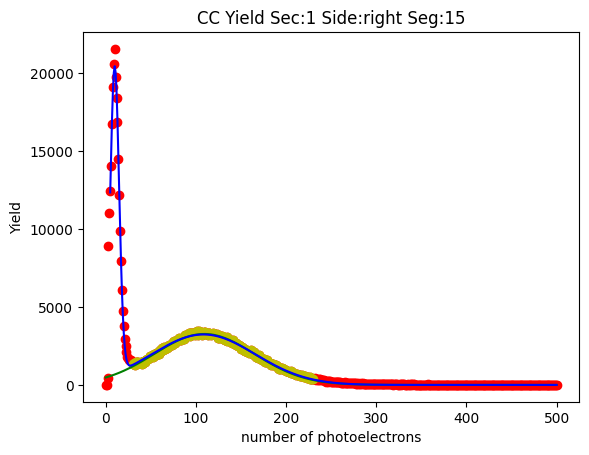

[3381.67044837  103.91669137   52.13468457]
[3.34418092e+03 1.02572541e+02 5.42668125e+01 2.03513021e+04
 1.01544268e+01 5.28253892e+00]


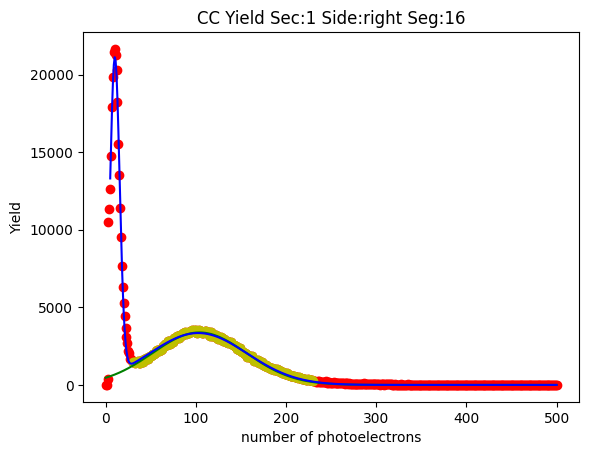

[1079.63790285   74.8979347    70.87305424]
[1.10234781e+03 6.05060698e+01 8.18646183e+01 1.94106265e+04
 9.50718485e+00 4.59540794e+00]


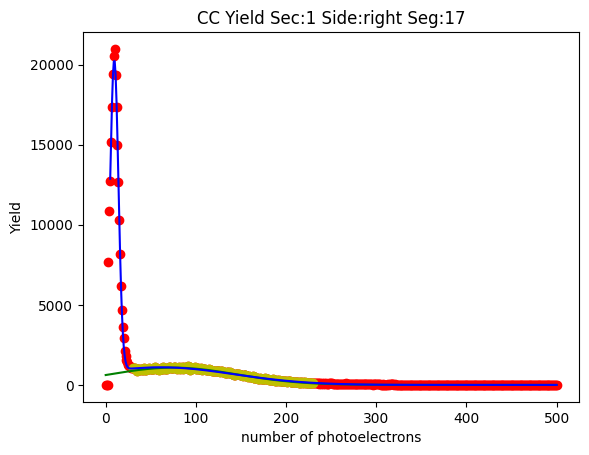

Runtime Error
	Just skip it for now


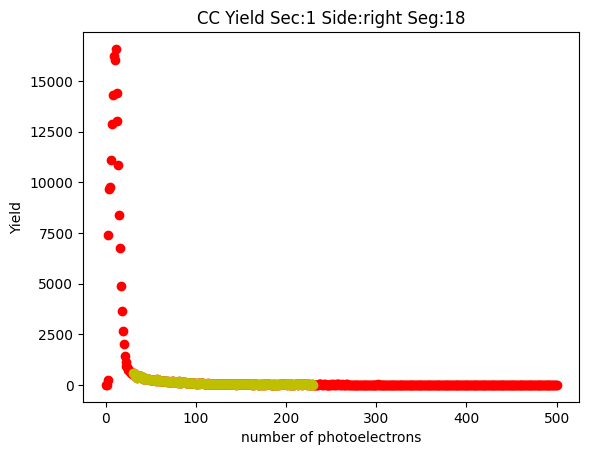

Runtime Error
	Just skip it for now


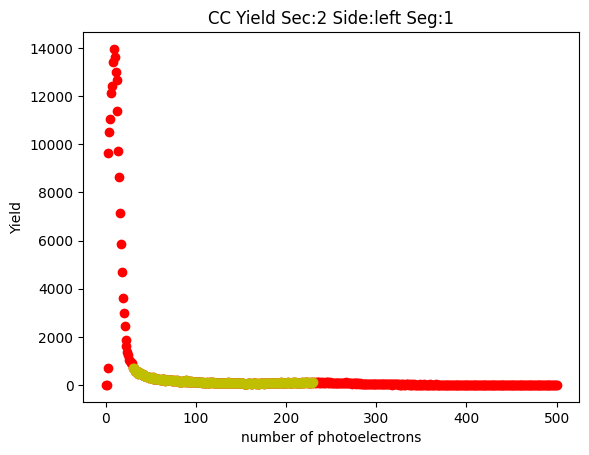

Runtime Error
	Just skip it for now


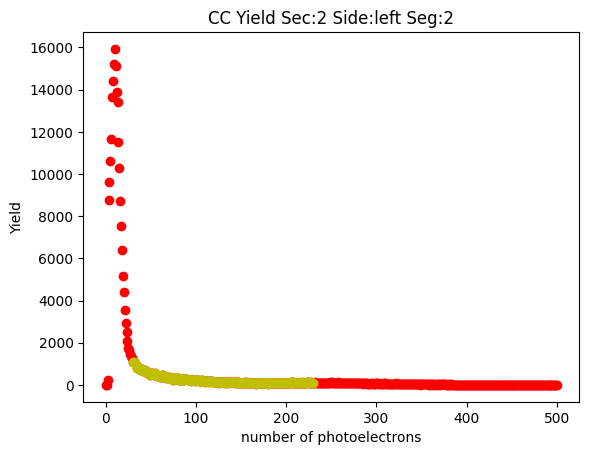

[5118.28259693   86.21910662   51.06539686]
[5.11326188e+03 8.63414604e+01 5.10912889e+01 1.65152586e+04
 1.01783558e+01 7.26968135e+00]


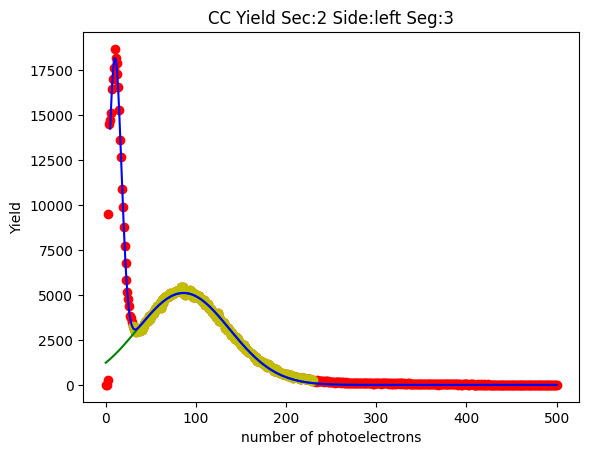

[16621.24793773    36.4784599     40.76821334]
[1.61999268e+04 4.07520236e+01 3.81006341e+01 2.45504277e+04
 9.38446322e+00 3.01551169e+00]


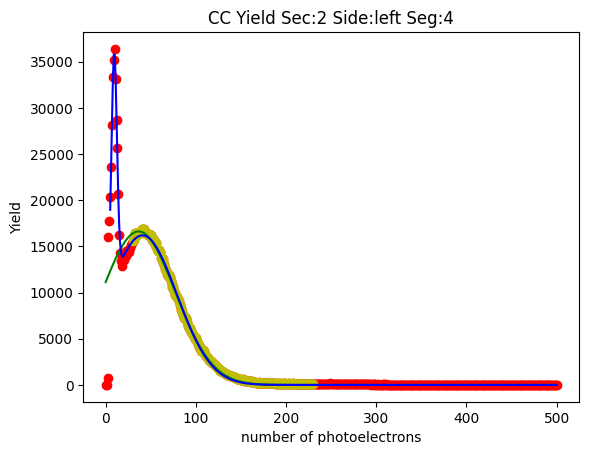

[22239.41314892    47.50368127    40.95008036]
[2.21146224e+04 4.89949787e+01 3.98997819e+01 1.40464257e+04
 1.04998582e+01 3.97514448e+00]


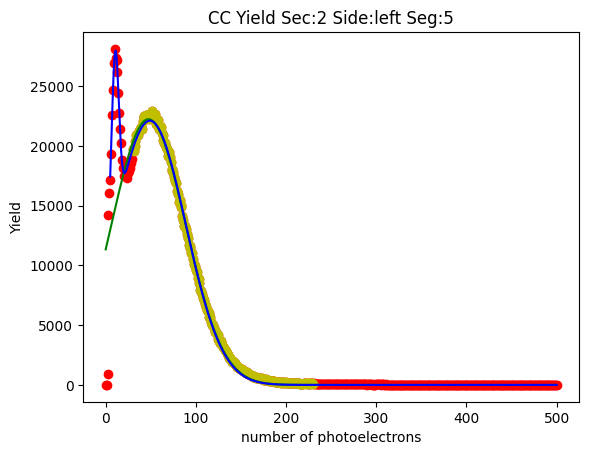

[23252.59625233    65.19052105    40.71167034]
[2.33116593e+04 6.62231667e+01 3.96680675e+01 3.96456789e+04
 9.22593927e+00 3.42985260e+00]


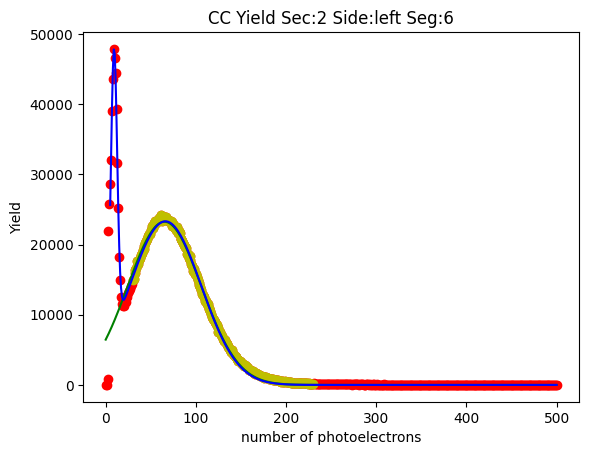

[18068.0682789     67.07866853    43.57471313]
[1.80725228e+04 6.74505903e+01 4.32341905e+01 1.83203767e+04
 1.03523768e+01 5.69162505e+00]


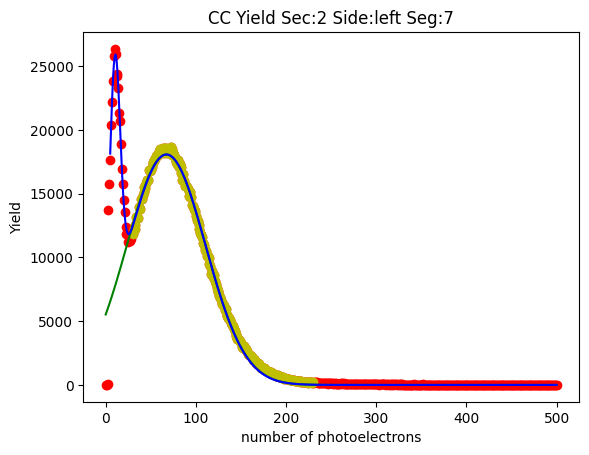

[19365.0654058     83.62915321    38.24669858]
[1.93939469e+04 8.37821626e+01 3.80299281e+01 4.36167788e+04
 9.70618404e+00 3.55883576e+00]


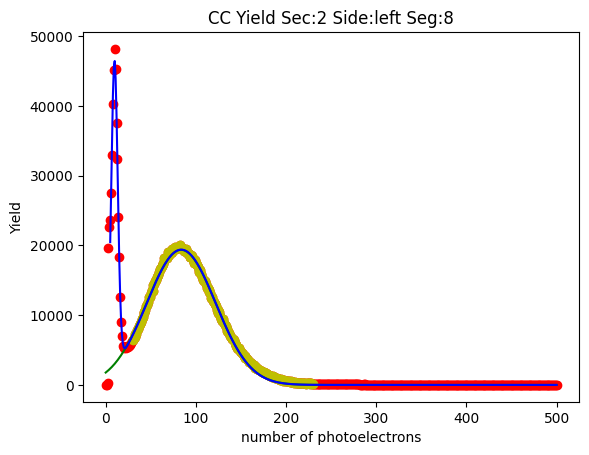

[12114.14522971    86.36102458    43.61905972]
[1.21181624e+04 8.64531503e+01 4.35241485e+01 3.61410898e+04
 9.94962099e+00 4.30172896e+00]


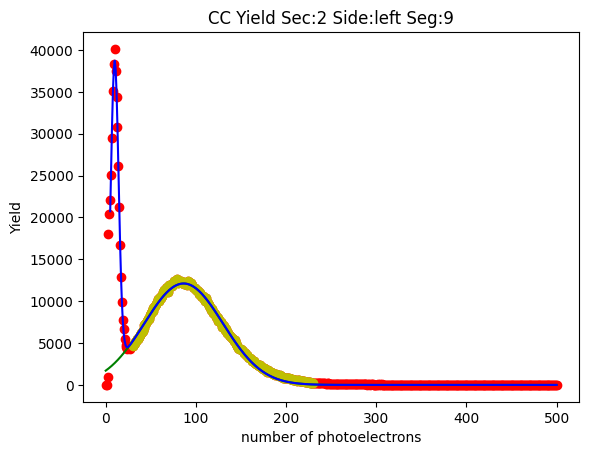

[9750.8434509    94.45075555   48.93366102]
[9.73005196e+03 9.42638824e+01 4.92899601e+01 2.47845472e+04
 1.00090348e+01 5.10297714e+00]


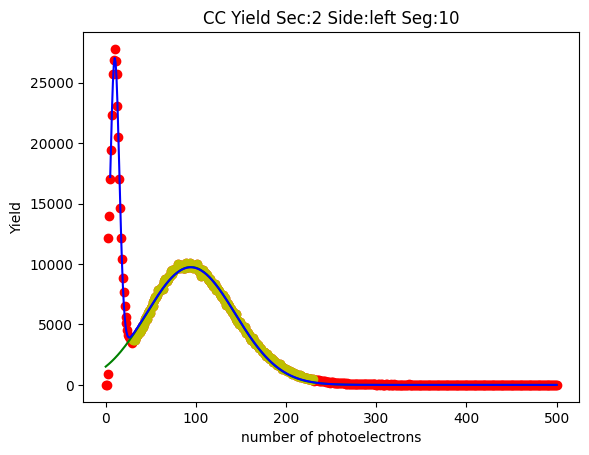

[13273.10800178    76.76126621    42.27494153]
[1.33128609e+04 7.73374282e+01 4.15934686e+01 3.63392749e+04
 8.12282227e+00 5.02471186e+00]


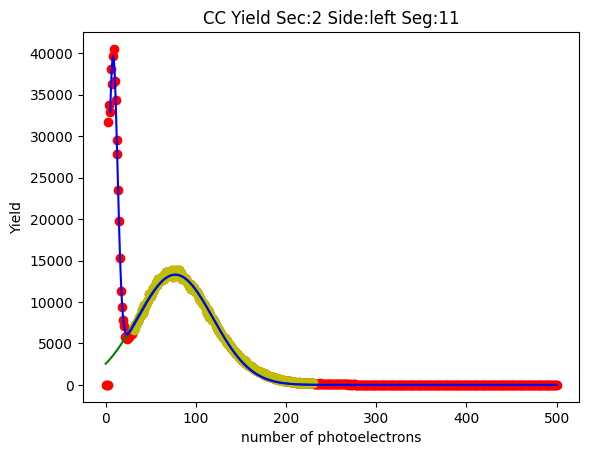

[7058.95743357  108.88464637   51.84326171]
[7.00228624e+03 1.08270734e+02 5.31613883e+01 3.72491397e+04
 9.37108101e+00 4.64918480e+00]


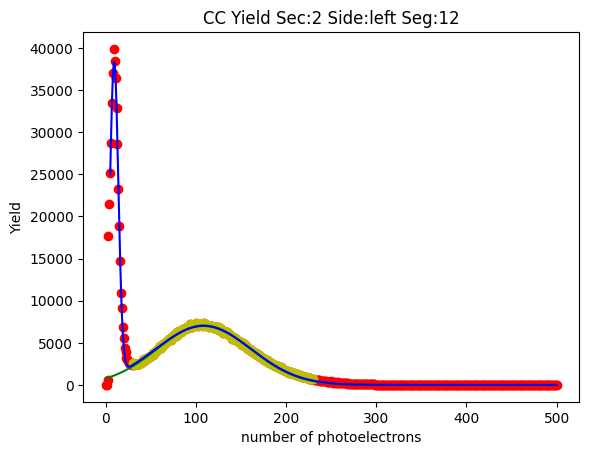

[8110.56482937  115.15675459   51.76233453]
[8.05222401e+03 1.14714056e+02 5.28782801e+01 2.81875700e+04
 1.01627038e+01 5.08155818e+00]


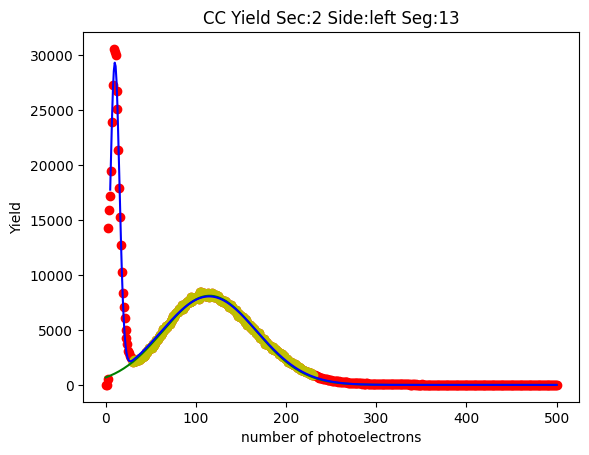

[5231.99509433  112.75561197   51.62583864]
[5.17470255e+03 1.11969424e+02 5.33680258e+01 2.86354496e+04
 1.01836037e+01 5.06674395e+00]


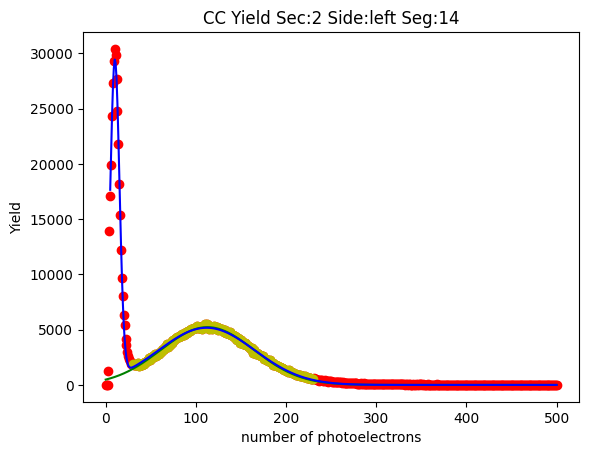

[4459.37656624  109.52838174   52.28301488]
[4.40254038e+03 1.08295319e+02 5.44831935e+01 3.02945055e+04
 9.97738237e+00 4.21793410e+00]


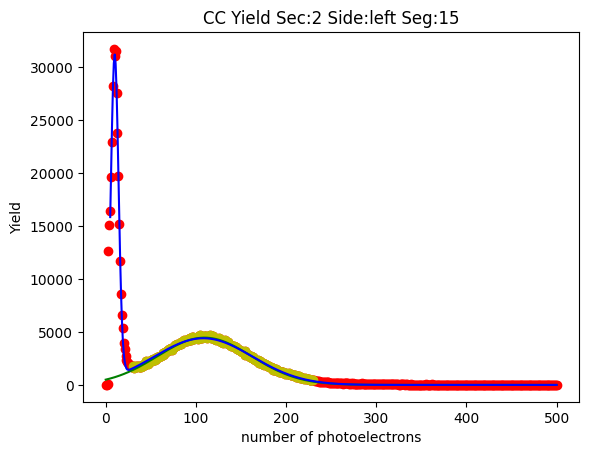

[3530.55074838   87.94998376   47.21878202]
[3.51615466e+03 8.72852135e+01 4.80968258e+01 2.40976381e+04
 9.95994863e+00 5.78914471e+00]


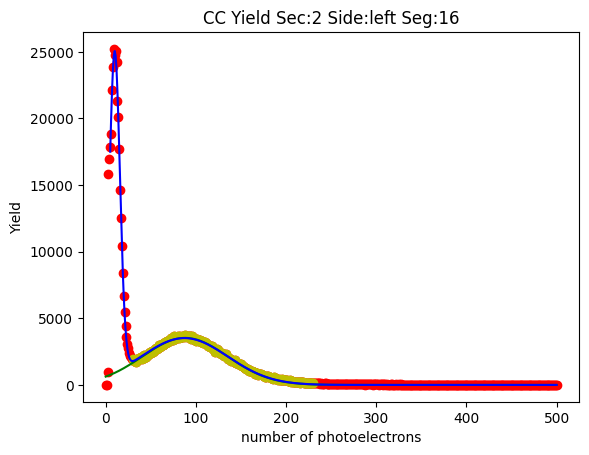

[1254.33214514   86.10342971   78.50803021]
[1.25965617e+03 7.95060915e+01 8.39419388e+01 2.07336846e+04
 9.65307815e+00 4.75679857e+00]


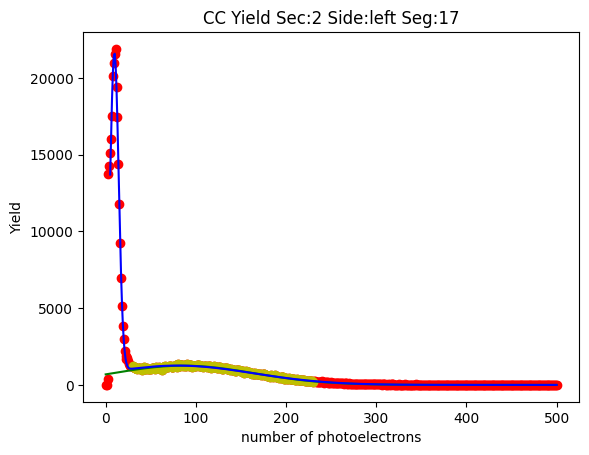

Runtime Error
	Just skip it for now


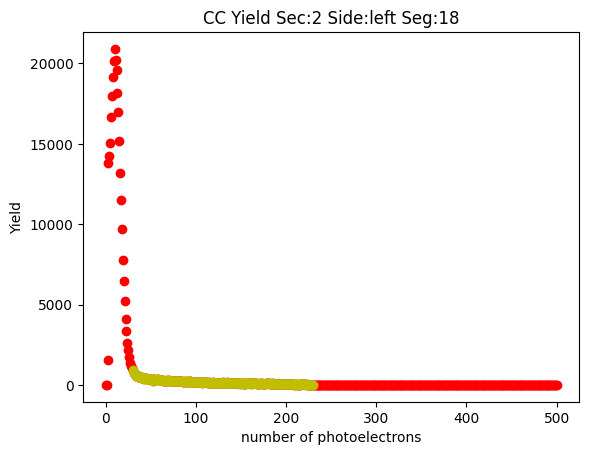

Runtime Error
	Just skip it for now


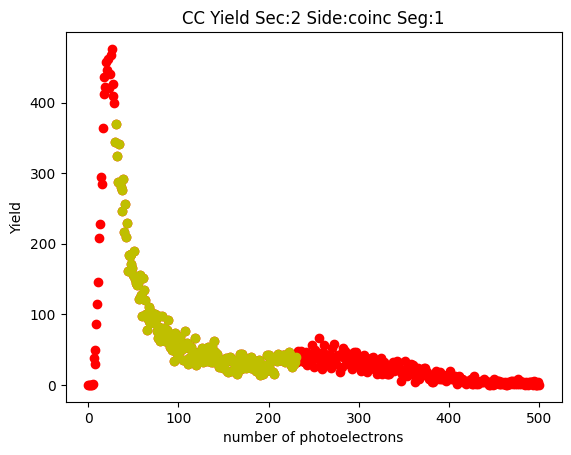

Runtime Error
	Just skip it for now


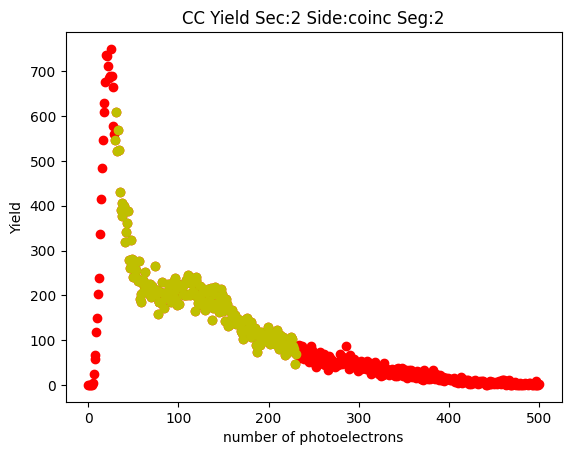

[4441.69255985  107.46854616   46.93983661]
[4.44224598e+03 1.07587687e+02 4.69220407e+01 6.82406083e+01
 2.02286088e+02 8.81379680e-04]


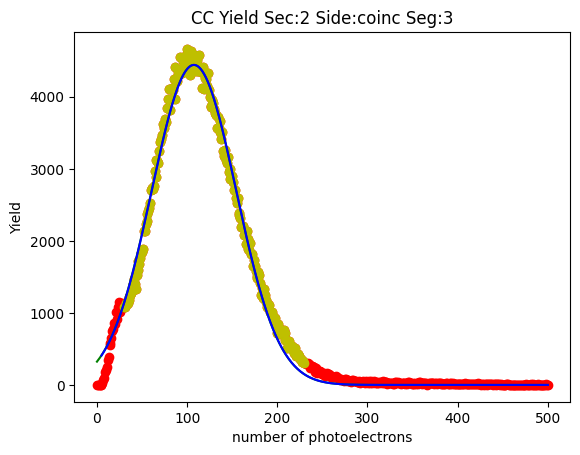

[4585.59278096   70.00631989   36.23177441]
[3065.40636043   58.29679338   25.09674691 2389.27282708   91.01038795
   34.11295972]


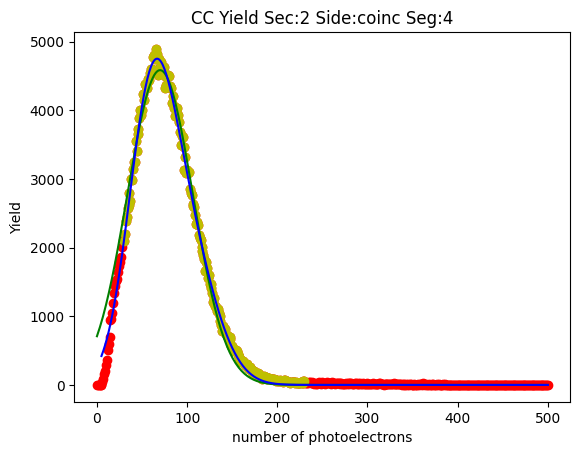

[4748.35693439   74.99376767   40.49566636]
[4.83649109e+03 7.67967396e+01 3.77817543e+01 4.58874289e+01
 9.03677839e+01 4.47186221e-02]


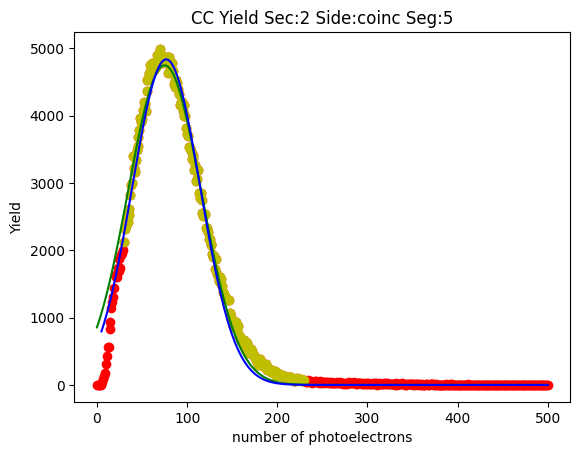

[3741.79361182   91.0182466    41.17742005]
[1677.09743141   99.16065992   53.11618672 2196.70415862   85.85542316
   31.75250355]


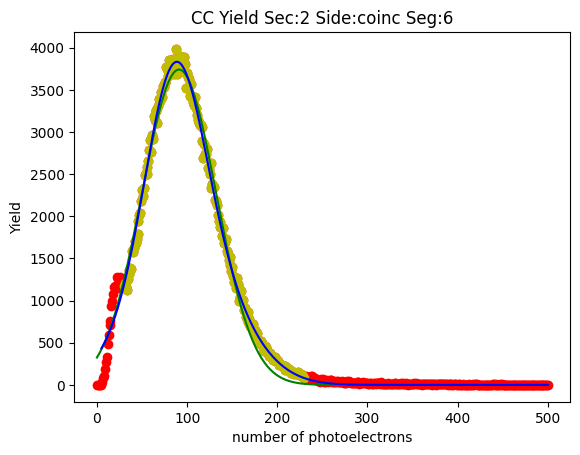

[2732.234146     75.36556108   38.10490595]
[ 459.29051873  114.92202648   46.06812843 2495.12577967   70.66439428
   33.70744613]


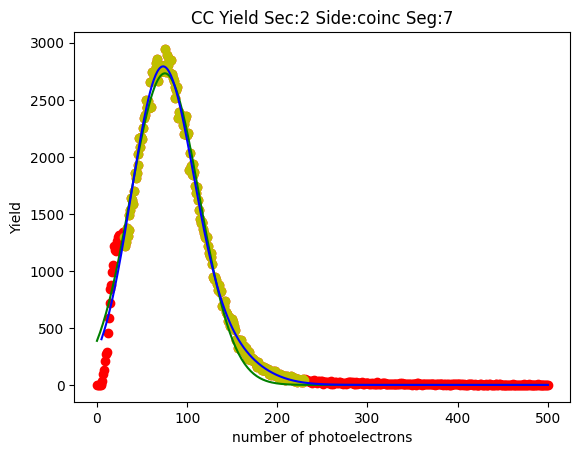

[2023.63351562   73.44684345   42.4380518 ]
[ 400.41373146  119.4594078    51.81241435 1847.64939063   68.05703911
   35.3301965 ]


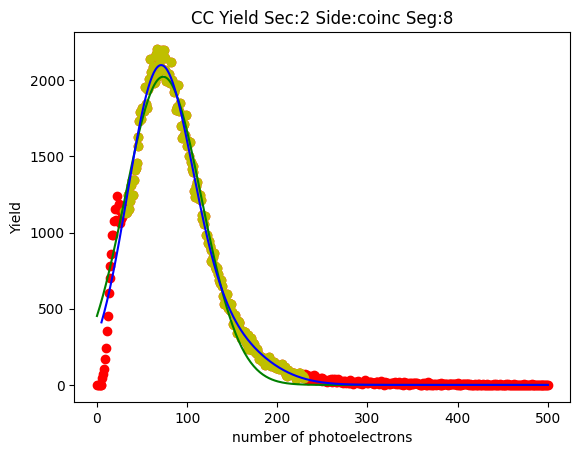

[1120.83407154   70.59047187   52.46469248]
[1043.50487673   68.91667214   56.08704785  168.96721461   75.18679431
   13.20753168]


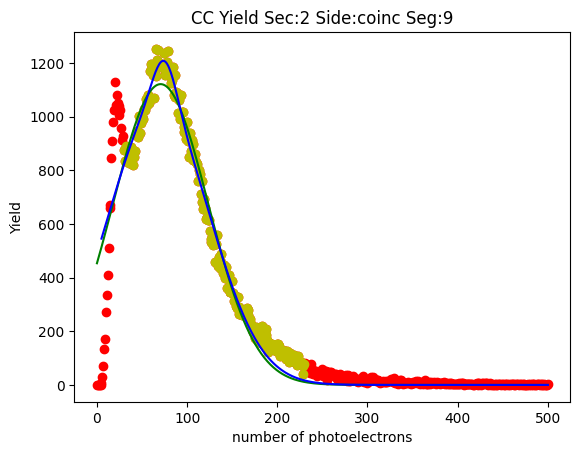

[1006.30513978   64.9901689    46.37140954]
[180.47336759 127.47506719  59.89978465 964.98183583  60.51878599
  37.19743779]


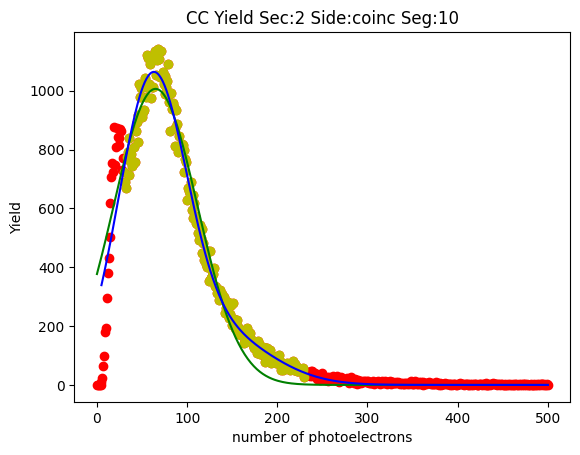

[1174.74275661   -2.59117496   71.7944188 ]


ValueError: `x0` is infeasible.

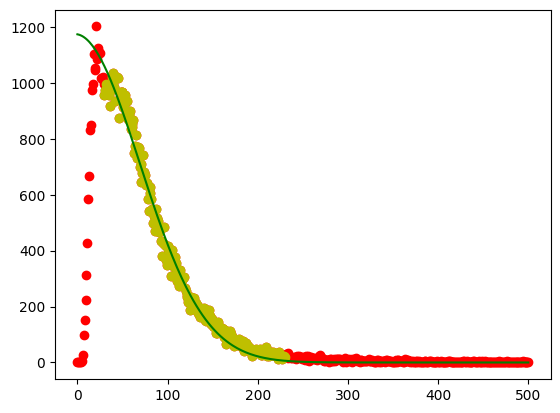

In [90]:
a_ele = 10000
m_ele = 70
s_ele = 30
a_pi = 500
l_pi = 20
m_pi = 20
s_pi = 5
initial_pars = [a_ele,m_ele,s_ele,a_pi,l_pi]
initial_pars = [a_ele,m_ele,s_ele,a_pi,m_pi,s_pi]

#fit_par =np.zeros((6,3,18,5))
#fit_err =np.zeros((6,3,18,5))
fit_par =np.zeros((6,3,18,6))
fit_err =np.zeros((6,3,18,6))

des_x = [i for i in range(Num_Xbins(cc_hist[0][0][0]))]

double_start = [[]]
cont_x = np.linspace(0,500,300)
for sec in range(6):
    for side in range(3):
        test1_pars = [a_ele,m_ele,s_ele]
        test_pars = initial_pars
        for seg in range(18):
            plt.scatter(Center_Xbins(cc_hist[sec][side][seg]),Values_1d(cc_hist[sec][side][seg]),color='r',label="data")
            try:
                tmp_x = [Center_Xbins(cc_hist[sec][side][seg])[i+30] for i in range(Num_Xbins(cc_hist[0][0][0])-300)]
                tmp_y = [Values_1d(cc_hist[sec][side][seg])[i+30] for i in range(Num_Xbins(cc_hist[0][0][0])-300)]
                plt.scatter(tmp_x,tmp_y,color='y',label="fit data")
                pars1, pars_cov1 = op.curve_fit(Gaus,tmp_x,tmp_y,p0=test1_pars,maxfev=5000)
                print(pars1)
                for i in range(3):
                    fit_par[sec][side][seg][i] = pars1[i]
                    fit_err[sec][side][seg][i] = pars_cov1[i][i]
                    test_pars[i] = pars1[i]
                plt.plot(cont_x,Gaus(cont_x,pars1[0],pars1[1],pars1[2]),color='g',label="fit1")
                try:
                    #tmp_x = [Center_Xbins(cc_hist[sec][side][seg])[i+5] for i in range(Num_Xbins(cc_hist[0][0][0])-275)]
                    #tmp_y = [Values_1d(cc_hist[sec][side][seg])[i+5] for i in range(Num_Xbins(cc_hist[0][0][0])-275)]
                    tmp_x = [Center_Xbins(cc_hist[sec][side][seg])[i+5] for i in range(Num_Xbins(cc_hist[0][0][0])-5)]
                    tmp_y = [Values_1d(cc_hist[sec][side][seg])[i+5] for i in range(Num_Xbins(cc_hist[0][0][0])-5)]
                    #pars2, pars_cov2 = op.curve_fit(Gaus_Poisson,tmp_x,tmp_y,p0=test_pars,bounds=[[0.0,0.0,0.0,0.0,0.0],[np.inf,np.inf,np.inf,np.inf,np.inf]],maxfev=5000)
                    pars2, pars_cov2 = op.curve_fit(Gaus2,tmp_x,tmp_y,p0=test_pars,bounds=[[0.0,0.0,0.0,0.0,0.0,0.0],[np.inf,np.inf,np.inf,np.inf,np.inf,np.inf]],maxfev=5000)
                    print(pars2)
                    for i in range(5):
                        fit_par[sec][side][seg][i] = pars2[i]
                        fit_err[sec][side][seg][i] = pars_cov2[i][i]
                        test_pars[i] = pars2[i]
                    #plt.plot(tmp_x,Gaus_Poisson(tmp_x,*pars2),color='b',label="fit2")
                    plt.plot(tmp_x,Gaus2(tmp_x,*pars2),color='b',label="fit2")
                except RuntimeError:
                    print("Runtime Error\n\tJust skip it for now")
            except RuntimeError:
                print("Runtime Error\n\tJust skip it for now")
                test_pars = initial_pars
            plt.title("CC Yield Sec:{} Side:{} Seg:{}".format(sec+1,sides[side],seg+1))
            plt.xlabel("number of photoelectrons")
            plt.ylabel("Yield")
            plt.show()

In [31]:
cc_hist[sec][side][seg].numpy()

(array([0.000e+00, 0.000e+00, 8.400e+01, 4.906e+03, 5.456e+03, 5.818e+03,
        6.664e+03, 7.310e+03, 8.288e+03, 8.468e+03, 8.998e+03, 8.138e+03,
        7.792e+03, 7.200e+03, 6.184e+03, 5.422e+03, 4.424e+03, 3.676e+03,
        3.214e+03, 2.656e+03, 2.268e+03, 1.822e+03, 1.362e+03, 1.324e+03,
        1.002e+03, 9.100e+02, 8.040e+02, 6.060e+02, 5.580e+02, 5.040e+02,
        4.520e+02, 3.720e+02, 3.900e+02, 3.240e+02, 3.380e+02, 3.060e+02,
        2.860e+02, 3.020e+02, 2.920e+02, 2.420e+02, 2.600e+02, 2.440e+02,
        2.620e+02, 2.340e+02, 2.260e+02, 1.820e+02, 2.360e+02, 1.880e+02,
        1.860e+02, 1.800e+02, 1.340e+02, 1.840e+02, 1.460e+02, 1.460e+02,
        1.680e+02, 1.640e+02, 1.380e+02, 1.720e+02, 1.100e+02, 1.440e+02,
        1.540e+02, 1.400e+02, 1.520e+02, 1.220e+02, 1.340e+02, 1.280e+02,
        9.000e+01, 1.080e+02, 1.260e+02, 1.040e+02, 1.040e+02, 1.160e+02,
        1.000e+02, 9.200e+01, 1.140e+02, 1.200e+02, 1.180e+02, 1.380e+02,
        9.400e+01, 9.600e+01, 9.200e+0